### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loading the csv file into a df

In [2]:
df = pd.read_csv("paris_attitude_rental.csv")
df.head(2)

,Address,Postal_code,Arrondissement,Area,Price,Bedroom,Occupants,Floor,Energy,GHG,Elevator,Available_date,Description
0,Place de Clichy - Paris,75009,9,109,3800,3,6,2,220.0,47.0,0.0,07/18/2024,This charming and very well situated 109 squar...
1,Auteuil - Paris,75016,16,63,2500,2,4,1,413.0,13.0,0.0,07/18/2024,This comfortable and spacious 63 square meters...


### Mapping Arrondissement Numbers with Arrondissement Names

In [3]:
# Mapping dictionary
arrondissement_names = {
    1: 'Louvre', 2: 'Bourse', 3: 'Temple', 4: 'Hôtel-de-Ville', 5: 'Panthéon', 6: 'Luxembourg', 7: 'Palais-Bourbon',
    8: 'Élysée', 9: 'Opéra', 10: 'Entrepôt', 11: 'Popincourt', 12: 'Reuilly', 13: 'Gobelins', 14: 'Observatoire',
    15: 'Vaugirard', 16: 'Passy', 17: 'Batignolles-Monceau', 18: 'Butte-Montmartre', 19: 'Buttes-Chaumont', 20: 'Ménilmontant',
    92:  'Hauts-de-Seine', 93: 'Seine-Saint-Denis', 94: 'Val-de-Marne'}

# Map the arrondissement numbers to names
df['Arrondissement_Name'] = df['Arrondissement'].map(arrondissement_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   int64  
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Energy               1495 non-null   float64
 9   GHG                  1494 non-null   float64
 10  Elevator             3215 non-null   float64
 11  Available_date       3783 non-null   object 
 12  Description          3782 non-null   object 
 13  Arrondissement_Name  3783 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 413.9+ KB


### Dropping "Energy" and "GHG" due to lot of NaN values

In [5]:
columns_to_drop = ['Energy', 'GHG']

# Dropping columns
df_truncated = df.drop(columns=columns_to_drop)

In [6]:
df_truncated["Elevator"].unique()

array([ 0.,  1., nan])

In [7]:
df_truncated['Elevator'] = df_truncated['Elevator'].fillna(0)

In [8]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   int64  
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Elevator             3783 non-null   float64
 9   Available_date       3783 non-null   object 
 10  Description          3782 non-null   object 
 11  Arrondissement_Name  3783 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 354.8+ KB


In [9]:
df_truncated['Arrondissement'] = df_truncated['Arrondissement'].astype(str)

In [10]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   object 
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Elevator             3783 non-null   float64
 9   Available_date       3783 non-null   object 
 10  Description          3782 non-null   object 
 11  Arrondissement_Name  3783 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 354.8+ KB


### Descriptive Statistics

In [12]:
df_truncated.describe()

,Postal_code,Area,Price,Bedroom,Occupants,Floor,Elevator
count,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000
mean,75425.767909,45.606397,2348.809939,1.283373,2.597674,2.914354,0.613270
std,2655.041253,29.482227,1526.961707,0.575414,1.188218,2.115782,0.487065
min,75001.000000,12.000000,790.000000,1.000000,1.000000,0.000000,0.000000
25%,75008.000000,25.000000,1400.000000,1.000000,2.000000,1.000000,0.000000
50%,75008.000000,36.000000,1935.000000,1.000000,2.000000,3.000000,1.000000
75%,75011.000000,56.000000,2783.500000,1.000000,3.000000,4.000000,1.000000
max,94300.000000,330.000000,24211.000000,5.000000,13.000000,9.000000,1.000000


In [13]:
average_prices_area = df_truncated.groupby(['Arrondissement_Name', 'Area', 'Bedroom', 'Floor'])['Price'].mean().reset_index()
average_prices_area.columns = ['Arrondissement_Name', 'Area', 'Bedroom', 'Floor', 'Average Price']  # Rename columns for clarity
print(average_prices_area)

      Arrondissement_Name  Area  Bedroom  Floor  Average Price
0     Batignolles-Monceau    15        1      4          842.0
1     Batignolles-Monceau    15        1      6         1075.0
2     Batignolles-Monceau    16        1      2         1054.0
3     Batignolles-Monceau    19        1      0         1065.0
4     Batignolles-Monceau    20        1      0         1000.0
...                   ...   ...      ...    ...            ...
1739               Élysée   112        2      7        10603.0
1740               Élysée   154        3      2         6500.0
1741               Élysée   161        3      1         9677.0
1742               Élysée   170        3      4         5500.0
1743               Élysée   200        3      1        12000.0

[1744 rows x 5 columns]


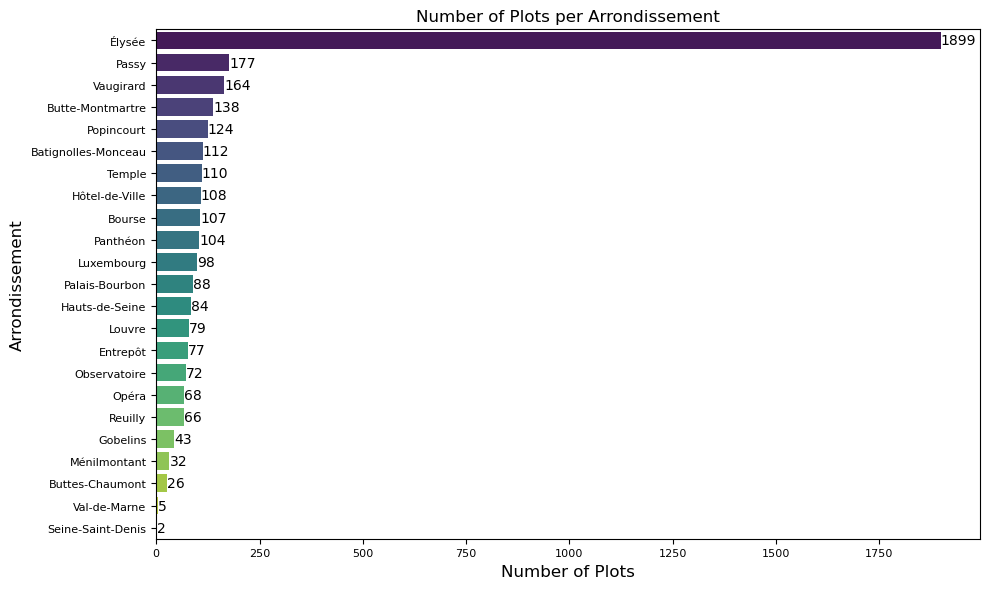

In [14]:
# Count the number of occurrences for each 'Arrondissement_Name'
counts = df_truncated['Arrondissement_Name'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis')

# Add the counts at the end of each bar
for i, value in enumerate(counts.values):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)  # Adjust the offset (0.1) as needed

plt.title('Number of Plots per Arrondissement', fontsize=12)
plt.xlabel('Number of Plots', fontsize=12)
plt.ylabel('Arrondissement', fontsize=12)
plt.tick_params(labelsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

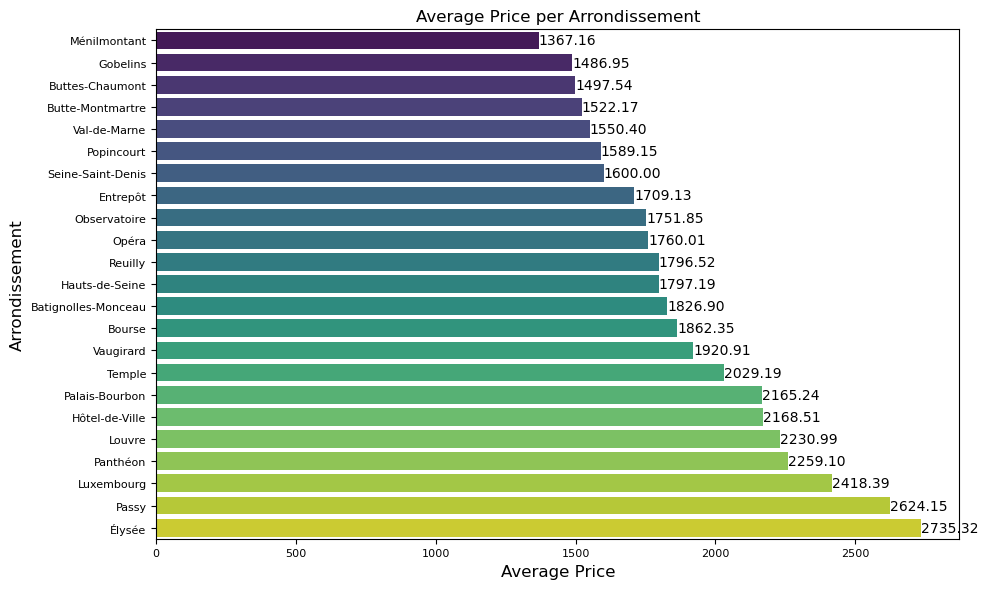

In [15]:
# Calculate the average price for each 'Arrondissement_Name'
average_prices = df_truncated.groupby('Arrondissement_Name')['Price'].mean().sort_values()

# Create a horizontal bar chart for average prices
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=average_prices.values, y=average_prices.index, palette='viridis')

# Add the average prices at the end of each bar
for i, value in enumerate(average_prices.values):
    ax.text(value + 0.1, i, f'{value:.2f}', va='center', fontsize=10)  # Adjust the offset (0.1) as needed

plt.title('Average Price per Arrondissement', fontsize=12)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Arrondissement', fontsize=12)
plt.tick_params(labelsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [17]:
df_truncated['Address'].nunique()

137

In [18]:
average_prices_area = df_truncated.groupby(['Address', 'Area'])['Price'].mean().reset_index()
average_prices_area.columns = ['Address', 'Area', 'Average Price']  # Rename columns for clarity
print(average_prices_area)

               Address  Area  Average Price
0       Alésia - Paris    19         1129.0
1       Alésia - Paris    23         1048.0
2       Alésia - Paris    24         1290.0
3       Alésia - Paris    25          951.0
4       Alésia - Paris    29         1344.0
...                ...   ...            ...
1430  Voltaire - Paris    50         2105.0
1431  Voltaire - Paris    68         2699.0
1432  Voltaire - Paris    79         2828.0
1433  Voltaire - Paris    86         3118.0
1434  Voltaire - Paris   120         3763.0

[1435 rows x 3 columns]


In [21]:
df_truncated.head(2)

,Address,Postal_code,Arrondissement,Area,Price,Bedroom,Occupants,Floor,Elevator,Available_date,Description,Arrondissement_Name
0,Place de Clichy - Paris,75009,9,109,3800,3,6,2,0.0,07/18/2024,This charming and very well situated 109 squar...,Opéra
1,Auteuil - Paris,75016,16,63,2500,2,4,1,0.0,07/18/2024,This comfortable and spacious 63 square meters...,Passy


In [23]:
df_truncated.to_csv("paris_attitude_rental_cleaned.csv")